In [1]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os

with open('QTable.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 167


In [470]:
os.getcwd()
#os.chdir("C:\\Users\\benja\\OneDrive\\Documents\\Queen Mary\\Artificial Intelligence in Games\\Assignments\\MARLO\\marlo")

'C:\\Users\\benja\\OneDrive\\Documents\\Queen Mary\\Artificial Intelligence in Games\\Assignments\\MARLO\\marlo'

In [457]:
file_list = [
    "Results_Alpha_0_08_Gamma_0_8_Decay_0_99.csv",
    "Results_Alpha_0_08_Gamma_1_Decay_0_99.csv",
    "Results_Alpha_0_08_Gamma_0_5_Decay_0_99.csv",
    "Results_Alpha_0_01_Gamma_1_Decay_0_99.csv",
    "Results_Alpha_0_01_Gamma_0_8_Decay_0_99.csv",
    "Results_Alpha_0_01_Gamma_0_5_Decay_0_99.csv",
    "Results_Alpha_0_1_Gamma_1_Decay_0_99.csv",
    "Results_Alpha_0_1_Gamma_0_8_Decay_0_99.csv",
    "Results_Alpha_0_1_Gamma_0_5_Decay_0_99.csv"
]

for file in file_list:
    print(file)
    with open(file) as f:
        Qtable = json.load(f)
    print("Length of QTable: " + str(len(Qtable)))
    printGrid(xs,zs,Qtable)

Results_Alpha_0_08_Gamma_0_8_Decay_0_99.csv


JSONDecodeError: Extra data: line 1 column 20 (char 19)

In [460]:
file

'Results_Alpha_0_08_Gamma_0_8_Decay_0_99.csv'

In [3]:
def printGrid(xs,zs,Qtable):

    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])

        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(grid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_xticklabels([str(i) for i in range(xLen+1)])
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_yticklabels([str(i) for i in range(xLen+1)])

[1, 2, 3, 4, 5, 6, 0]
[0, 1, 2, 3, 4, 5, 6]
[0, 270, 90, 180]


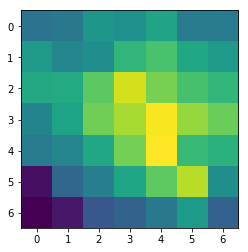

In [26]:
with open('QTableBackUp.json') as f:
    Qtable = json.load(f)
    xs = []; zs = []; yaws = []
    for key in Qtable:
        values = key.split(":")
        x = int(values[0])
        z = int(values[1])
        yaw = int(values[2])
        if x not in xs: xs.append(x)
        if z not in zs: zs.append(z)
        if yaw not in yaws: yaws.append(yaw)

    print(xs); print(zs); print(yaws)
    printGrid(xs,zs,Qtable)

In [1]:


file_list = [
    "Qlearning_data/Results_Alpha_0_08_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_08_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_08_Gamma_0_5_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_01_Gamma_0_5_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_1_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_0_8_Decay_0_99.csv",
    "Qlearning_data/Results_Alpha_0_1_Gamma_0_5_Decay_0_99.csv"
]
for file in file_list:
    my_data = genfromtxt(file, delimiter=',')
    y = [x[0] for x in my_data]
    time = [x[2] for x in my_data]
    epsilon = [x[-1] for x in my_data]
    
    print("Games: " , str(len(y)), " - Average Time: ", str(sum(time)/len(y)))
    print("Average reward for the last 5 games: %.2f with an epsilon of %.2f" % (sum(y[-5:])/5, epsilon[-1]))
    plt.plot(y[-5:]) # Plot shown when learning with epsilon decay at 0.99

NameError: name 'genfromtxt' is not defined

Games:  84  - Average Time:  527.8571428571429
Average reward for the last 5 games: 0.32 with an epsilon of 0.43


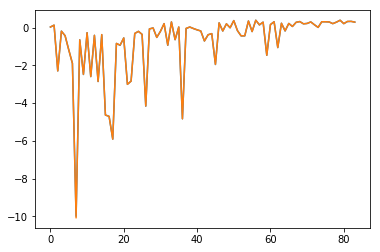

In [44]:
my_data = genfromtxt("qlearningResults.csv", delimiter=',')
y = [x[0] for x in my_data]
actionCount = [x[1] for x in my_data]
time = [x[2] for x in my_data]
epsilon = [x[-1] for x in my_data]
actionReward = [ -0.01*x -0.1  if x >= 999 else (-0.01*x) + 0.5 for x in actionCount]

print("Games: " , str(len(y)), " - Average Time: ", str(sum(time)/len(y)))
print("Average reward for the last 5 games: %.2f with an epsilon of %.2f" % (sum(y[-5:])/5, epsilon[-1]))

plt.plot(y)# Plot shown when learning with epsilon decay at 0.99
# If there is a difference between the action reward and the y, then there has been a missed reward
plt.plot(actionReward)

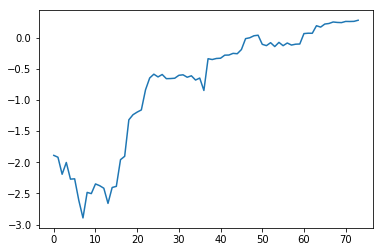

In [45]:
averagingOver = 10
avgScore = [np.mean(y[x-averagingOver:x]) for x in range(averagingOver,len(y)) ]
plt.plot(avgScore)

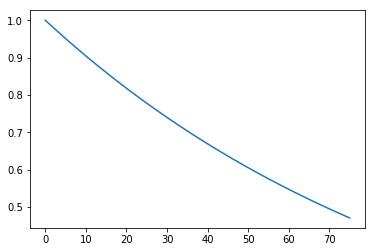

In [43]:
plt.plot(epsilon)

-3.0486956430420773


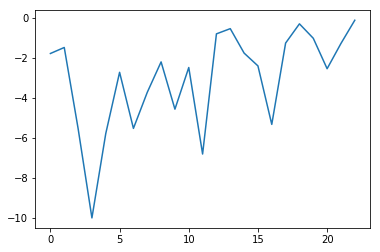

In [23]:
plt.plot(y) # Run when epsilon set to 0 and loaded from q table built from previous 2 runs
print(np.mean(y))